<a href="https://colab.research.google.com/github/Ganga-dhar/cotton-disease-calssfication-using-Transfer-Learning/blob/main/CNN_from_Scratch_and_AlexNet_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "mathyam" # username from the json file
os.environ['KAGGLE_KEY'] = "ac43c48d6cec800e4ff66f9e864fba08" # Provide your key from the json file
#!kaggle competitions download -c dogs-vs-cats # api copied from kaggle

!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

 91% 134M/148M [00:00<00:00, 199MB/s]
100% 148M/148M [00:00<00:00, 200MB/s]


In [4]:
# Upload data and extract the contents
from zipfile import ZipFile

file_name = "/content/cotton-disease-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Cotton Disease/train'
valid_path = '/content/Cotton Disease/test'

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

In [10]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [9]:
test_set = test_datagen.flow_from_directory('/content/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [12]:
"""
Creating CNN model from Scratch.
"""
# Initialising the CNN
cnn = tf.keras.models.Sequential()
# step:1 Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
# step:2 pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#step:3 flaterning
cnn.add(tf.keras.layers.Flatten())
#step:4 Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# step:5 Output layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

______________________________________________________________________________
# # approch-2 -  Building the CNN

# # Initialising the CNN
# cnn = Sequential()

# # Step 1 - Convolution
# cnn.add(Conv2D(filters = 32, padding = 'same', kernel_size=3, activation='relu',
#                               input_shape=[128, 128, 3]))

# # Step 2 - Pooling
# cnn.add(MaxPool2D(pool_size=2, strides=2))

# cnn.add(Dropout(rate=0.25))

# # Adding a second convolutional layer
# cnn.add(Conv2D(filters = 32, padding='same', kernel_size=3, activation='relu'))
# cnn.add(Conv2D(filters = 64, padding='same', kernel_size=3, activation='relu'))
# cnn.add(MaxPool2D(pool_size=2, strides=2))

# cnn.add(Dropout(rate=0.25))

# # Step 3 - Flattening
# cnn.add(Flatten())

# # Step 4 - Full Connection
# cnn.add(Dense(units=128, activation='relu'))
# cnn.add(Dense(units=128, activation='relu'))

# cnn.add(Dropout(rate=0.25))

# # Step 5 - Output layer
# cnn.add(Dense(units=4, activation='softmax'))

In [13]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
61/61 [==============================] - 68s 565ms/step - loss: 1.3408 - accuracy: 0.3952 - val_loss: 1.2375 - val_accuracy: 0.3962
Epoch 2/20
61/61 [==============================] - 32s 523ms/step - loss: 1.0587 - accuracy: 0.5536 - val_loss: 0.8928 - val_accuracy: 0.6226
Epoch 3/20
61/61 [==============================] - 32s 522ms/step - loss: 0.8349 - accuracy: 0.6674 - val_loss: 0.7856 - val_accuracy: 0.6604
Epoch 4/20
61/61 [==============================] - 32s 520ms/step - loss: 0.6218 - accuracy: 0.7468 - val_loss: 0.5035 - val_accuracy: 0.8208
Epoch 5/20
61/61 [==============================] - 32s 521ms/step - loss: 0.5416 - accuracy: 0.7929 - val_loss: 0.4725 - val_accuracy: 0.8302
Epoch 6/20
61/61 [==============================] - 32s 524ms/step - loss: 0.4789 - accuracy: 0.8011 - val_loss: 0.4410 - val_accuracy: 0.8019
Epoch 7/20
61/61 [==============================] - 32s 524ms/step - loss: 0.4330 - accuracy: 0.8257 - val_loss: 0.4324 - val_accuracy: 0.8491

In [15]:
import matplotlib.pyplot as plt

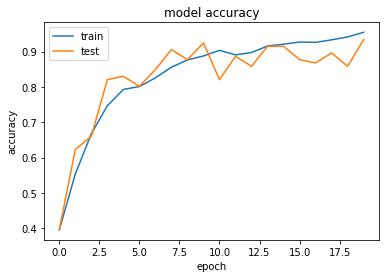

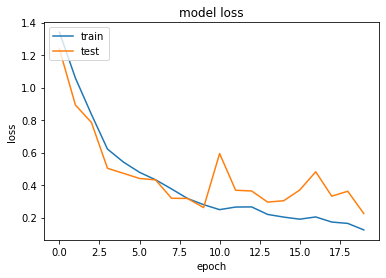

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

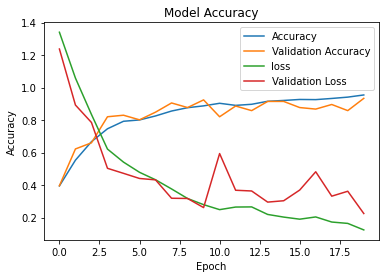

In [18]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [23]:
#Save the model as h5 file
from tensorflow.keras.models import load_model
cnn.save('model_inceptionV3.h5')

AlexNet

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

In [21]:
"""
Building AlexNet Model.
"""
model = Sequential()

# Block 1
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Block 2
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Block 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Block 4
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Block 5
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Flattening
model.add(Flatten())

# Dense Layer block 1
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4)) # Add Dropout to prevent overfitting
model.add(BatchNormalization())

# Dense Layer block 2
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Dense Layer block 3
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Additional dense
#model.add(Dense(17))
#model.add(Activation('relu'))

# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))

In [ ]:
model.summary()

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model.fit_generator(training_set,
                              validation_data=test_set,
                              epochs = 20,
                                   steps_per_epoch=len(training_set),
                              validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 52s 559ms/step - loss: 1.8754 - accuracy: 0.4337 - val_loss: 19.4364 - val_accuracy: 0.2547
Epoch 2/20
61/61 [==============================] - 32s 533ms/step - loss: 1.0716 - accuracy: 0.5788 - val_loss: 4.2060 - val_accuracy: 0.3774
Epoch 3/20
61/61 [==============================] - 32s 537ms/step - loss: 0.8759 - accuracy: 0.6461 - val_loss: 3.8220 - val_accuracy: 0.3585
Epoch 4/20
61/61 [==============================] - 31s 522ms/step - loss: 0.7649 - accuracy: 0.7137 - val_loss: 2.5626 - val_accuracy: 0.3396
Epoch 5/20
61/61 [==============================] - 32s 534ms/step - loss: 0.7421 - accuracy: 0.7197 - val_loss: 4.3407 - val_accuracy: 0.4906
Epoch 6/20
61/61 [==============================] - 32s 536ms/step - loss: 0.6732 - accuracy: 0.7463 - val_loss: 2.9739 - val_accuracy: 0.4245
Epoch 7/20
61/61 [==============================] - 31s 522ms/step - loss: 0.5922 - accuracy: 0.7773 - val_loss: 0.8007 - val_accuracy: 0.698

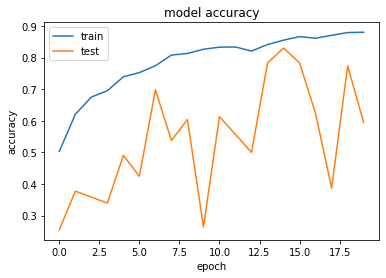

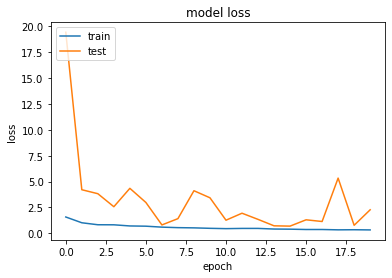

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()